<a href="https://colab.research.google.com/github/mccarthyajb/HL-NTAC/blob/main/1_Read_In_and_Resample_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Mon Jun  6 10:53:37 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    35W / 250W |    451MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# SDAV Extra - Violin Plots

This notebook will demonstrate the use of Violin Plots. This visualisation technique, similar to a box plot, is well suited for comparing multiple distributions, and show a curved distribution plot for each feature under consideration. Below shows a simple violin plot example using Seaborn.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at ./mount; to attempt to forcibly remount, call drive.mount("./mount", force_remount=True).
Drive Mounted


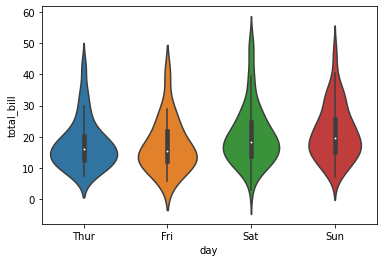

In [ ]:
#!pip install seaborn
!pip install lime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('./mount')
print("Drive Mounted")

tips = sns.load_dataset("tips")
ax = sns.violinplot(x="day", y="total_bill", data=tips)

## Case Study: Comparing Benign and DDoS behaviours in network traffic analysis using CICIDS2017

Let's consider an example where we want to look at benign and malicious network traffic. We will use to CICIDS2017 dataset for this. This dataset captures in the region of 80 numerical features that characterise network activity. Each data instance has been labelled as either benign or as an attack type (we focus on DDoS here, however other attacks are present in the full dataset). What data attributes set these two classes apart? We can use violin plots to judge this visually over the entire dataset.

### Load in dataset and clean it up

First we will load in the data set, and we will remove all Not-a-Number and Infinity values that may be present. We will also remove columns that contain only zeros (i.e., no separating features).

In [ ]:
# Load in the dataset
df = pd.read_csv('mount/My Drive/Colab Notebooks/CICIDS2017/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
df1=pd.read_csv('mount/My Drive/Colab Notebooks/CICIDS2017/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
print("Read in df1 - DDoS")

df2=pd.read_csv('mount/My Drive/Colab Notebooks/CICIDS2017/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
print("Read in df2 - PortScan")
    
df3=pd.read_csv('mount/My Drive/Colab Notebooks/CICIDS2017//Friday-WorkingHours-Morning.pcap_ISCX.csv')
print("Read in df3 - Botnet")
    
df4=pd.read_csv('mount/My Drive/Colab Notebooks/CICIDS2017//Monday-WorkingHours.pcap_ISCX.csv')
print("Read in df4 - Benign (Normal Human Activities)")
    
df5=pd.read_csv('mount/My Drive/Colab Notebooks/CICIDS2017/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
print("Read in df5 - Infiltration")
    
df6=pd.read_csv('mount/My Drive/Colab Notebooks/CICIDS2017//Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
print("Read in df6 - Web Attacks")
    
df7=pd.read_csv('mount/My Drive/Colab Notebooks/CICIDS2017//Tuesday-WorkingHours.pcap_ISCX.csv')
print("Read in df7 - Brute Force")
    
df8=pd.read_csv('mount/My Drive/Colab Notebooks/CICIDS2017//Wednesday-workingHours.pcap_ISCX.csv')
print("Read in df8 - DoS/DDoS/HeartBleed")

#frames = [df1, df2, df3, df4]
frames = [df1, df2, df3, df4, df5, df6, df7, df8]
print("Before Concat")
df = pd.concat(frames)

#df = pd.read_csv('./CICIDS2017/TrafficLabelling/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
#df = pd.read_csv('./CICIDS2017/TrafficLabelling/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
#df = pd.read_csv('./CICIDS2017/TrafficLabelling/Friday-WorkingHours-Morning.pcap_ISCX.csv')
#df = pd.read_csv('./CICIDS2017/TrafficLabelling/Monday-WorkingHours.pcap_ISCX.csv')
# Remove NaN and Inf
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
# Remove columns with all zero values
df = df.loc[:, (df != 0).any(axis=0)]
# Output table
df

Read in df1 - DDoS
Read in df2 - PortScan
Read in df3 - Botnet
Read in df4 - Benign (Normal Human Activities)
Read in df5 - Infiltration
Read in df6 - Web Attacks
Read in df7 - Brute Force
Read in df8 - DoS/DDoS/HeartBleed
Before Concat


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,53,32215,4,2,112,152,28,28,28.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692699,53,324,2,2,84,362,42,42,42.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692700,58030,82,2,1,31,6,31,0,15.5,21.92031,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692701,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
# What columns are left?
print (df.columns)
# How many columns?
print ("Length: ", len(df.columns))

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Fwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
       'FIN Flag Count', ' SYN Flag Count', 

### Normalise each column

Each column has its own range of values - some are quite narrow, some are quite large. We often normalise data to make it easier to work with and draw comparisons - this essentially means scaling it to be within a fixed range. Here, we want to normalise each feature indepedently - essentially meaning that each column will have a minimum value of zero and a maximum value of one, and all values for that particular feature will be scaled within this range.

We will use the sci-kit learn library to achieve this.

In [ ]:
# Import scikit learn
from sklearn import preprocessing

# Creating X and Y from the dataset
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df[' Label'])
Y_attack = le.transform(df[' Label']) # multi-class 
Y_class = df.iloc[:,-1].values # binary

# Extract only the numerical feature columns
subset = df.iloc[:,7:65].astype(float)
# Define the scaler
min_max_scaler = preprocessing.MinMaxScaler()
# Apply the scaler to each column of our dataframe
df2 = pd.DataFrame(min_max_scaler.fit_transform(subset), columns=subset.columns, index=subset.index)
df2

,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,...,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max
0,0.002581,0.001010,0.000000,0.000000,0.000000,0.000000,0.0,0.113636,0.444444,1.333333e-07,...,9.323764e-07,0.000000,0.000000e+00,0.000519,0.000000,0.000005,1.0,0.0,0.0,0.0
1,0.002581,0.001010,0.000000,0.000307,0.002072,0.001034,0.0,0.111968,0.336391,1.016667e-06,...,4.661882e-07,0.000003,9.153974e-09,0.000458,0.003922,0.000000,1.0,0.0,0.0,0.0
2,0.002581,0.001010,0.000000,0.000307,0.002072,0.001034,0.0,0.112020,0.339744,5.416666e-07,...,4.661882e-07,0.000003,9.153974e-09,0.000458,0.003922,0.000000,1.0,0.0,0.0,0.0
3,0.002581,0.001010,0.000000,0.000307,0.002072,0.001034,0.0,0.112072,0.343137,3.916666e-07,...,4.661882e-07,0.000003,9.153974e-09,0.000488,0.005035,0.000000,1.0,0.0,0.0,0.0
4,0.002581,0.001010,0.000000,0.000000,0.000000,0.000000,0.0,0.113636,0.444444,1.333333e-07,...,9.323764e-07,0.000000,0.000000e+00,0.000504,0.000000,0.000005,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,0.012043,0.004713,0.000000,0.003891,0.026243,0.013102,0.0,0.111925,0.333364,5.379999e-05,...,8.702180e-06,0.000007,2.319007e-07,0.000000,0.000000,0.000014,1.0,0.0,0.0,0.0
692699,0.018065,0.007070,0.000000,0.009268,0.062500,0.031204,0.0,0.112511,0.335391,1.008333e-06,...,6.526635e-06,0.000007,5.522898e-07,0.000000,0.000000,0.000005,1.0,0.0,0.0,0.0
692700,0.000000,0.002609,0.003076,0.000307,0.002072,0.001034,0.0,0.112115,0.339431,4.500000e-07,...,2.408639e-06,0.000003,9.153974e-09,0.015366,0.000015,0.000000,1.0,0.0,0.0,0.0
692701,0.013763,0.005386,0.000000,0.006554,0.044199,0.022067,0.0,0.111921,0.333335,1.248483e-03,...,1.491802e-05,0.000007,3.905696e-07,0.000000,0.000000,0.000023,1.0,0.0,0.0,0.0


### Separate data based on class

We have scaled the entire dataset so that all data for each feature is scaled in a consistent manner. We now want to split our dataset based on the classes of data that exist. Here, we know we have benign and DDoS classes.

In [ ]:
# Output the classes
outcome = df[' Label'].unique()
print(outcome)

Y_attack = df[' Label']
print(Y_attack)

['BENIGN' 'DDoS' 'PortScan' 'Bot' 'Infiltration'
 'Web Attack � Brute Force' 'Web Attack � XSS'
 'Web Attack � Sql Injection' 'FTP-Patator' 'SSH-Patator' 'DoS slowloris'
 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye' 'Heartbleed']
0         BENIGN
1         BENIGN
2         BENIGN
3         BENIGN
4         BENIGN
           ...  
692698    BENIGN
692699    BENIGN
692700    BENIGN
692701    BENIGN
692702    BENIGN
Name:  Label, Length: 2827876, dtype: object


#Resample the dataset adjusting for bias

In [ ]:
# Resample
import imblearn
print("imblearn:" + imblearn.__version__)
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


# print(Y_class)
print(Y_attack)
x_scaled = np.array(df2)
transformed_label = le.fit_transform(Y_attack)
print(transformed_label)

#define oversampling strategy
print(outcome)
# orig_sampling_strategy = {
#     "BENIGN"                    : 2271320,
#     "DDoS"                      :  128025,
#     'PortScan'                  :  158804, 
#     'Bot'                       :    1956, 
#     'Infiltration'               :      36,
#     'Web Attack � Brute Force'  :    1507, 
#     'Web Attack � XSS'          :     652,
#     'Web Attack � Sql Injection':      21, 
#     'FTP-Patator'               :    7935, 
#     'SSH-Patator'               :    5897, 
#     'DoS slowloris'             :    5796,
#     'DoS Slowhttptest'          :    5499, 
#     'DoS Hulk'                  :  231073, 
#     'DoS GoldenEye'             :   10293, 
#     'Heartbleed'                :      11
# }

over_sampling_strategy = { # Minimum 25
    "BENIGN"                    : 2271320,
    "DDoS"                      :  128025,
    'PortScan'                  :  158804, 
    'Bot'                       :    1956, 
    'Infiltration'               :      36,
    'Web Attack � Brute Force'  :    1507, 
    'Web Attack � XSS'          :     652,
    'Web Attack � Sql Injection':      25, 
    'FTP-Patator'               :    7935, 
    'SSH-Patator'               :    5897, 
    'DoS slowloris'             :    5796,
    'DoS Slowhttptest'          :    5499, 
    'DoS Hulk'                  :  231073, 
    'DoS GoldenEye'             :   10293, 
    'Heartbleed'                :      25
}

over = RandomOverSampler(sampling_strategy = over_sampling_strategy)
print("Oversampling...")
x_over, y_over = over.fit_resample(x_scaled, Y_attack)
x_scaled = x_over
Y_attack = y_over

print("Finished oversampling...")

#define undersampling strategy
under = RandomUnderSampler(sampling_strategy = 'not minority')
print("Undersampling...")
x_under, y_under = under.fit_resample(x_scaled, Y_attack)
print("Finished undersampling...")

print(x_under)
print(y_under)
#from now on use undersampled
x_scaled = x_under
Y_class  = y_under

tempdf2 = pd.DataFrame(x_scaled,columns=subset.columns)
templabledf = pd.DataFrame(Y_class,columns=[' Label']) 


df2 = pd.concat([tempdf2, templabledf.reindex(df1.index)], axis=1)
print(df2.shape)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df2[' Label'])
transformed_label = le.transform(templabledf[' Label']) # multi-class 
print(transformed_label)




imblearn:0.8.1
0         BENIGN
1         BENIGN
2         BENIGN
3         BENIGN
4         BENIGN
           ...  
692698    BENIGN
692699    BENIGN
692700    BENIGN
692701    BENIGN
692702    BENIGN
Name:  Label, Length: 2827876, dtype: object
[0 0 0 ... 0 0 0]
['BENIGN' 'DDoS' 'PortScan' 'Bot' 'Infiltration'
 'Web Attack � Brute Force' 'Web Attack � XSS'
 'Web Attack � Sql Injection' 'FTP-Patator' 'SSH-Patator' 'DoS slowloris'
 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye' 'Heartbleed']
Oversampling...
Finished oversampling...
Undersampling...
Finished undersampling...
[[0.         0.0177689  0.04516295 ... 0.00106487 0.00219625 0.0040889 ]
 [0.01548387 0.00605973 0.         ... 0.         0.         0.        ]
 [0.00258065 0.00100996 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         

In [ ]:
print(df2)
df2.to_csv('mount/My Drive/Colab Notebooks/CICIDS2017/resampledforbalance.csv')


         Fwd Packet Length Min   Fwd Packet Length Mean  \
0                     0.000000                 0.017769   
1                     0.015484                 0.006060   
2                     0.002581                 0.001010   
3                     0.000000                 0.013148   
4                     0.000000                 0.001739   
...                        ...                      ...   
225740                     NaN                      NaN   
225741                     NaN                      NaN   
225742                     NaN                      NaN   
225743                     NaN                      NaN   
225744                     NaN                      NaN   

         Fwd Packet Length Std  Bwd Packet Length Max   Bwd Packet Length Min  \
0                     0.045163               0.074757                0.000000   
1                     0.000000               0.014235                0.095994   
2                     0.000000               0.0